# Step 1: Descrition of Problem and data

The challenge problem is to classify tweets into two categories: those describing real disasters and those that do not. This task falls under the domain of Natural Language Processing (NLP).

In this particular competition, the dataset consists of tweets along with metadata such as keywords and locations. The training set (train.csv) contains 7613 entries, each with five columns:

* id: A unique identifier for each tweet.
* keyword: A particular keyword from the tweet (may be blank).
* location: The location the tweet was sent from (may be blank).
* text: The text content of the tweet.
* target: Denotes whether a tweet is about a real disaster (1) or not (0).

The text column contains the actual tweet content, which is the primary focus for NLP tasks. The challenge involves building a machine learning model that can effectively learn from this data to predict whether a given tweet is describing a real disaster.

The size of the data is as follows:

* Training set: 7613 entries
* Test set: The size is not specified, but it can be assumed to be of similar magnitude.

The dimensionality of the data:
* Training set: 7613 rows × 5 columns
* Test set: 3262 rows x 4 columns

The data is structured as a tabular dataset with rows representing individual tweets and columns representing different attributes such as tweet content, keywords, and location.

In [37]:
#  importing libraries and data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [38]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [39]:
# test data shape
df_test.shape

(3263, 4)

In [40]:
# train data info, type, and shape
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


# Step 2: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

From the info() function above, we can see that there are many missing values in the dataset. We will be cleaning the data to address duplicates, 

In [41]:
# Unique values of the 'keyword' column
df_train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [42]:
# Unique values of the 'location' column
df_train['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [43]:
df_train['keyword'].isna().sum()/df_train.shape[0] * 100

0.8012610009194797

Since the keyword null values are only 0.8%, we can drop them.

In [44]:
df_train.dropna(subset=['keyword'], inplace=True)
df_train.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [45]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 31 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7552 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7552 non-null   object
 4   target    7552 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.0+ KB
None


In [46]:
df_train['location'].isna().sum()/df_train.shape[0] * 100

32.733050847457626

Since the location null values make up 32% of the total dataset, we can replace the NaN's with something else.

In [47]:
# fill na for location
df_train['location'].fillna('', inplace=True)
df_train.head()

/tmp/ipykernel_33/1946405244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['location'].fillna('', inplace=True)


,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [48]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7552 entries, 31 to 7582
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7552 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  7552 non-null   object
 3   text      7552 non-null   object
 4   target    7552 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.0+ KB
None


In [49]:
# check duplicated rows
df_train[df_train.duplicated()]

,id,keyword,location,text,target


No duplicated rows found. 

Next step is to process the text to remove emojis, punctuation, HTML tags, and etc.

In [50]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    
    # Lowercase text
    text = text.lower()
    
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text

# Apply preprocessing function to the 'text' column
df_train['text'] = df_train['text'].apply(preprocess_text)

print(df_train.head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
    id keyword                       location  \
31  48  ablaze                     Birmingham   
32  49  ablaze  Est. September 2012 - Bristol   
33  50  ablaze                         AFRICA   
34  52  ablaze               Philadelphia, PA   
35  53  ablaze                     London, UK   

                                                 text  target  
31  bbcmtd wholesale markets ablaze httptcolhyxeohy6c       1  
32  always try bring heavy metal rt httptcoyao1e0xngw       0  
33  africanbaze breaking newsnigeria flag set abla...       1  
34                                  crying set ablaze       0  
35  plus side look sky last night ablaze httptcoqq...       0  


In [51]:
# view unique values
df_train['text'].unique()

array(['bbcmtd wholesale markets ablaze httptcolhyxeohy6c',
       'always try bring heavy metal rt httptcoyao1e0xngw',
       'africanbaze breaking newsnigeria flag set ablaze aba httptco2nndbgwyei',
       ...,
       'fx forex trading cramer igers 3 words wrecked disneys stock httptco7ennullkzm',
       'engineshed great atmosphere british lion gig tonight hearing wrecked httptcoomnbatjeao',
       'cramer igers 3 words wrecked disneys stock cnbc httptcon6rbnhmtd4'],
      dtype=object)

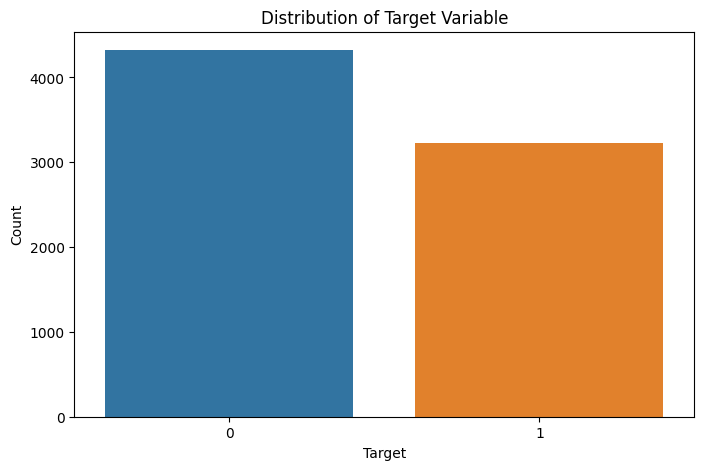

In [52]:
# Visualize histogram of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

From the plot above, we can see the distribution of labels. There is a slight imbalance as there are more labels having "0" as a value rather than "1", but since it's not a significant differnce we will not have to try and balance it.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


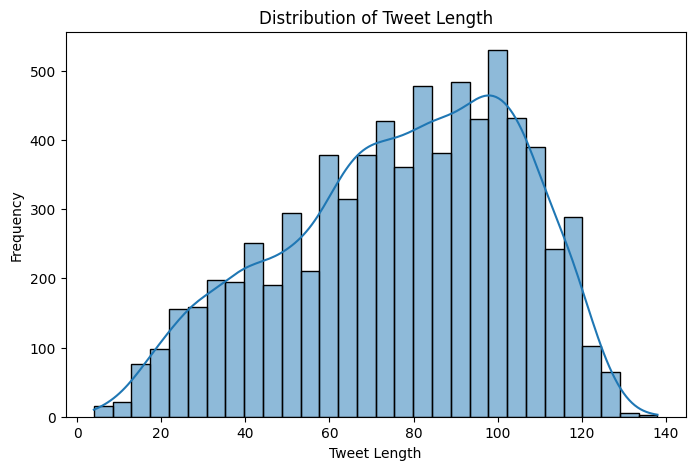

In [53]:
# Visualize histogram of tweet length
df_train['tweet_length'] = df_train['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(df_train['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

From the histogram plot above, we can see that the tweet length very roughly follows a normal distribution but it's skewed.

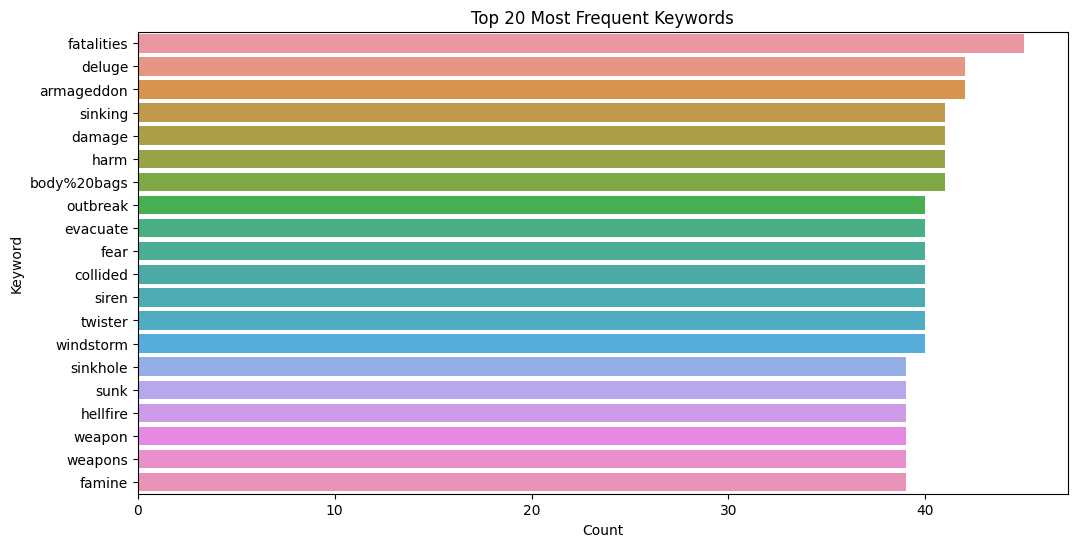

In [54]:
# Visualize keyword usage
plt.figure(figsize=(12, 6))
sns.countplot(y='keyword', data=df_train, order=df_train['keyword'].value_counts().iloc[:20].index)
plt.title('Top 20 Most Frequent Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

From the plot above, we can see 20 most frequently used keywords. The word fatalities is used the most to describe disasters which makes sense.

# Model Architecture

For this project, a suitable model architecture would be a sequential neural network using word embeddings such as Word2Vec or GloVe.

Word embeggings are a dense vector representation of words in high-dimensional space, where similar words are closer to each other. These embeddings capture semantic relationships between words and it allows the model to leverage pre-trained embeddings. We preprocessed text lowercasing, removing emojis, HTML tags, punctuation, and stopwords. Next, we will convert the text into word embeddings using GloVe. The model will consist of:
* embedding layer
* bidirectional LSTM layer
* dense output layer

This architecture leverages word embeddings and sequential neural networds to classify disaster tweets.

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load GloVe embeddings
glove_embeddings_index = load_glove_embeddings('/kaggle/input/glovefile/glove.6B.100d.txt')

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['text'])
sequences = tokenizer.texts_to_sequences(df_train['text'])

# Pad sequences
max_length = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Create embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = len(next(iter(glove_embeddings_index.values())))
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define model architecture
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length, trainable=False),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [57]:
# Train the model
history = model.fit(sequences_padded, 
                    df_train['target'], 
                    epochs=11, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5776 - loss: 0.6760 - val_accuracy: 0.5420 - val_loss: 0.6816
Epoch 2/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5817 - loss: 0.6666 - val_accuracy: 0.5692 - val_loss: 0.6637
Epoch 3/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6179 - loss: 0.6514 - val_accuracy: 0.5639 - val_loss: 0.6799
Epoch 4/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6334 - loss: 0.6392 - val_accuracy: 0.5910 - val_loss: 0.6566
Epoch 5/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6579 - loss: 0.6273 - val_accuracy: 0.5870 - val_loss: 0.6687
Epoch 6/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6572 - loss: 0.6185 - val_accuracy: 0.5857 - val_loss: 0.6636
Epoch 7/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6690 - loss: 0.6039 - val_accuracy: 0.5930 - val_loss: 0.6602
Epoch 8/11
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6697 - loss: 0.6047 - val_accu

236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


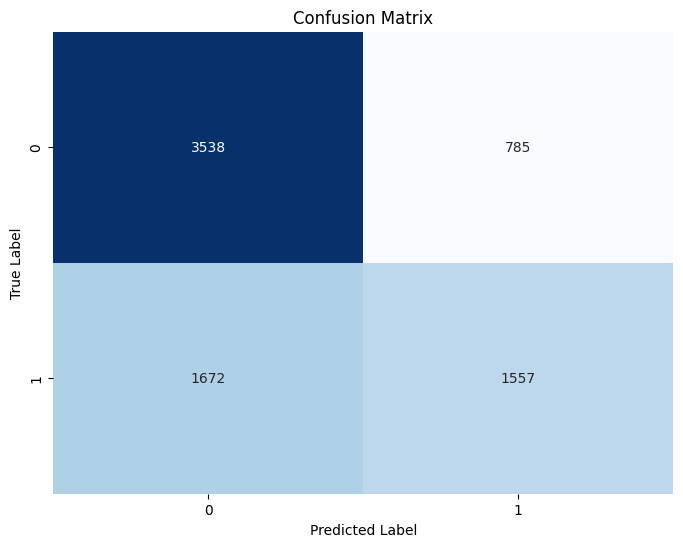

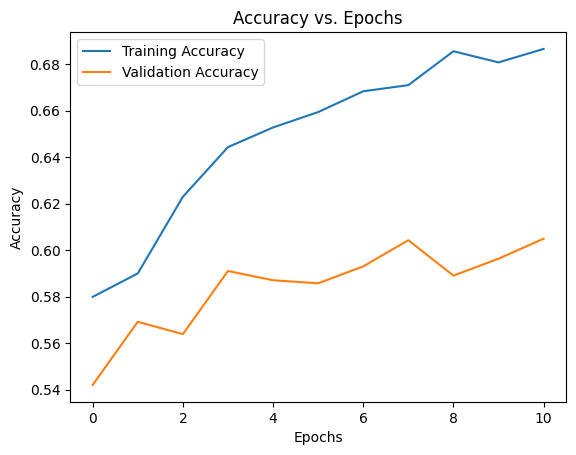

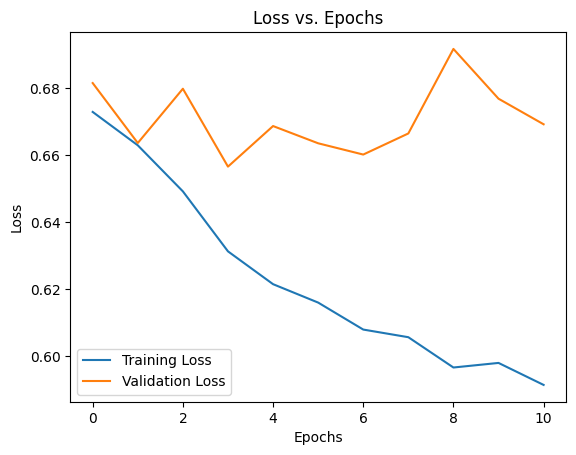

In [58]:
from sklearn.metrics import confusion_matrix

# Predict the target labels
predicted_labels = (model.predict(sequences_padded) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(df_train['target'], predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs. Epochs Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

# Loss vs. Epochs Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

Based on the confusion matrix above, the model performed did not perform too well. The true positives are high but the true negatives are not higher than the false negatives.

The plot showing accuracy vs epochs shows that the model is overfitting to the training data since the training accuracy line is higher than the validation line.

The plot showing loss vs epochs also suggests overfitting to the training data as the validation loss is higher than the training loss.

# Step 4: Results and Analysis

In this section we try a different architure for comparison and see if we can improve the performace.

The changes we will make are:
* Adding complexity with an additional Bidirectional LSTM layer, dropout, and batch normalization to prevent overfitting.
* Regularization: Adding dropout layers to stabalize training
* Optimization Algorithm: Lowering the Adam learning rate
* Epochs: Training the model for more epochs to see if it improves performance 
* Early stopping: to stop training when it stops improving, possibly prevent overfitting.

In [59]:
from keras.layers import BatchNormalization, Dropout

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length, trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5), 
    BatchNormalization(),  
    Bidirectional(LSTM(64)),
    Dropout(0.5), 
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),  
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [60]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    sequences_padded,  
    df_train['target'],  
    epochs=50, 
    batch_size=32,  
    validation_split=0.2, 
    callbacks=[early_stopping] 
)

Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5218 - loss: 0.8832 - val_accuracy: 0.5420 - val_loss: 0.6963
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.5417 - loss: 0.8466 - val_accuracy: 0.5420 - val_loss: 0.7005
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5336 - loss: 0.8373 - val_accuracy: 0.5652 - val_loss: 0.6740
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5315 - loss: 0.8291 - val_accuracy: 0.5606 - val_loss: 0.6709
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.5391 - loss: 0.8177 - val_accuracy: 0.5791 - val_loss: 0.6666
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.5574 - loss: 0.7876 - val_accuracy: 0.5751 - val_loss: 0.6804
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.5525 - loss: 0.7781 - val_accuracy: 0.5745 - val_loss: 0.6779
Epoch 8/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.5695 - loss: 0.7438 - val_

236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


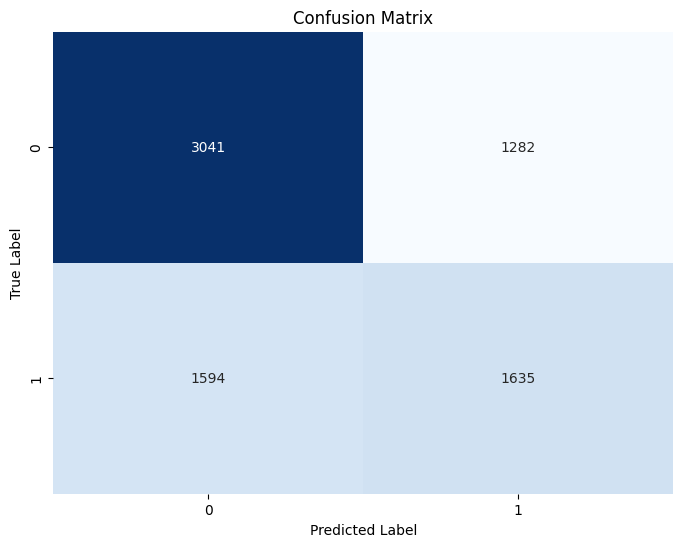

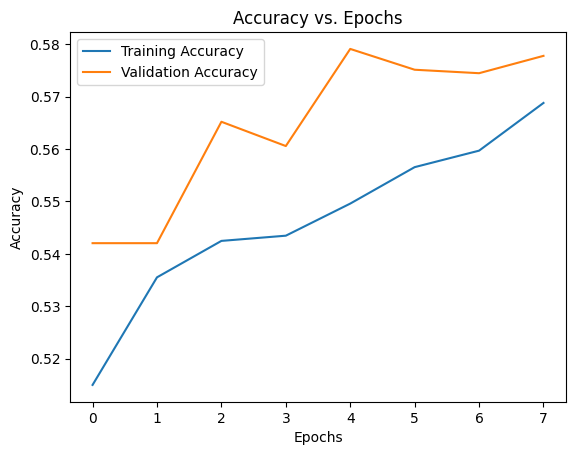

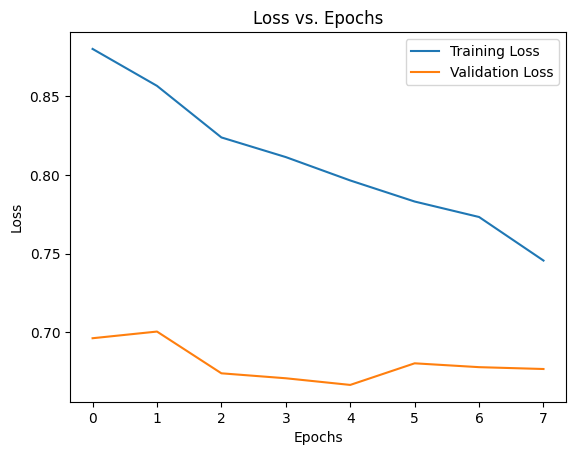

In [62]:
# Make predictions
predictions = (model.predict(sequences_padded) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(df_train['target'], predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Accuracy vs. Epochs Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

# Loss vs. Epochs Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()


In the plots above, the confusion matrix is worse than the previous model where the false negative is high and the true negative is lower.

The accuracy plot is much better since the validation accuracy is higher than training.

The loss vs epoch plot is also better as the training loss is above the validation.

Overall this new model is slightly better but there is room for improvement. The model seems to not be overfitting as much.

# Step 5: Conclusion

The modified model showed a lot of improvement over the previous one such that the accuracy and loss was better. Regularization techniques like dropout and batch normalization were used, but further tuning and architectural adjustments may be needed. The learning rate was reduced, but more hyperparameter optimization could be explored. In conclusion, while progress was made, there's still room for improvement.

In [63]:
predictions[30:40]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [64]:
predictions = np.transpose(predictions)[0]
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [65]:
df_test.shape

(3263, 4)

In [66]:
predictions = predictions[:3263]

In [67]:
final_df = pd.DataFrame()
final_df['id'] = df_test['id'].to_list()
final_df['target'] = predictions
final_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [68]:
final_df.to_csv('submission.csv',index=False)